In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("housing.csv")

# EDA

Load the data

In [3]:
df.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

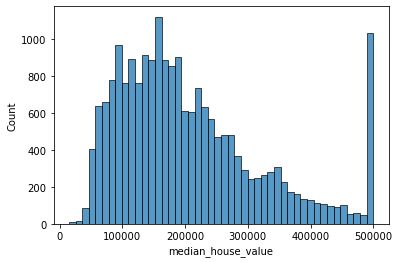

In [4]:
sns.histplot(df.median_house_value)

The data have long tail

# Features

In [5]:
columns = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']

In [6]:
df = df[columns]

# Question 1

In [7]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Column total_bedrooms have 207 missing values

# Question 2

In [8]:
df.population.median()

1166.0

Split the data

In [9]:
from sklearn.model_selection import train_test_split

In [39]:
df_full_train, df_test = train_test_split(df,test_size=0.2)
df_train, df_val = train_test_split(df_full_train,test_size=0.25)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [40]:
df_train.reset_index(inplace=True)
df_val.reset_index(inplace=True)
df_test.reset_index(inplace=True)

# Question 3

In [41]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]

In [42]:
df_train.isnull().sum()

index                   0
latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        116
population              0
households              0
median_income           0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            20640 non-null  float64
 1   longitude           20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [44]:
def prepare_X(df,fill):
    df = df.fillna(fill)
    X = df.values
    return X

In [45]:
df_train.isnull().sum()

index                   0
latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        116
population              0
households              0
median_income           0
dtype: int64

Fill it with 0

In [46]:
X_train_0 = prepare_X(df_train,0) 
w0,w = train_linear_regression(X_train_0,y_train)
y_pred_0 = w0 + X_train_0.dot(w)
y_pred_0

array([12.07781222, 12.42871478, 11.9812501 , ..., 11.86709039,
       11.69122053, 11.88441165])

In [90]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [48]:
rmse(y_train,y_pred_0)

0.3387487804642704

<AxesSubplot:ylabel='Count'>

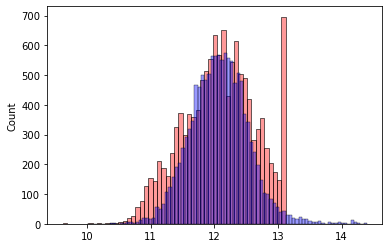

In [49]:
sns.histplot(y_train,color='r',alpha=0.4)
sns.histplot(y_pred_0,color='b',alpha=0.4)

In [50]:
X_val_0 = prepare_X(df_val,0) 
y_pred_0 = w0 + X_val_0.dot(w)
y_pred_0

array([11.40281947, 11.6297182 , 12.57922127, ..., 12.07293287,
       11.26608198, 12.22630899])

In [53]:
rmse(y_val,y_pred_0)

0.3411115986652666

Fill it with the mean

In [54]:
X_train_mean = prepare_X(df_train,df_train.total_bedrooms.mean()) 
w0,w = train_linear_regression(X_train_mean,y_train)
y_pred_mean = w0 + X_train_mean.dot(w)
y_pred_mean

array([12.06827502, 12.42900931, 11.98489647, ..., 11.87313531,
       11.69657745, 11.87554325])

In [55]:
rmse(y_train,y_pred_mean)

0.33826247638902357

<AxesSubplot:ylabel='Count'>

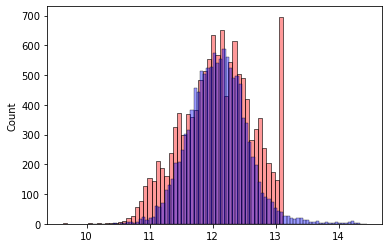

In [56]:
sns.histplot(y_train,color='r',alpha=0.4)
sns.histplot(y_pred_mean,color='b',alpha=0.4)

In [65]:
X_val_mean = prepare_X(df_val,df_train.total_bedrooms.mean()) 
y_pred_mean = w0 + X_val_mean.dot(w)
y_pred_mean

array([11.39707811, 11.62470346, 12.57791528, ..., 12.07748226,
       11.26185129, 12.22212779])

In [70]:
rmse(y_val,y_pred_mean)

0.34115506720570815

Both are equally good

# Question 4

In [74]:
def train_linear_regression_reg(X,y,r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T.dot(X)
    XTX = XTX +r*np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]

In [77]:
X_train_0 = prepare_X(df_train,0) 
w0,w = train_linear_regression_reg(X_train_0,y_train)
y_pred_0 = w0 + X_train_0.dot(w)
y_pred_0

array([12.07786695, 12.42864079, 11.98142801, ..., 11.86730513,
       11.69129474, 11.8844954 ])

In [78]:
rmse(y_pred_0,y_train)

0.33874880115077816

In [79]:
X_val_0 = prepare_X(df_val,0) 
y_pred_0 = w0 + X_val_0.dot(w)
y_pred_0

array([11.40293163, 11.62985074, 12.57922952, ..., 12.07287072,
       11.26628978, 12.22618069])

In [80]:
rmse(y_pred_0,y_val)

0.3411105691060756

In [82]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train_0 = prepare_X(df_train,0) 
    w0,w = train_linear_regression_reg(X_train_0,y_train,r)
    
    X_val_0 = prepare_X(df_val,0) 
    y_pred_0 = w0 + X_val_0.dot(w)
    print(r,rmse(y_pred_0,y_val))

0 0.3411115986652666
1e-06 0.34111159761359994
0.0001 0.3411114937113792
0.001 0.3411105691060756
0.01 0.341103249712968
0.1 0.3411799479147674
1 0.3443316594191786
5 0.3487063026385836
10 0.3498004605268058


r = 0.01 give the best RMSE

# Question 5

In [92]:
rmse_list = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_full_train, df_test = train_test_split(df,test_size=0.2,random_state=s)
    df_train, df_val = train_test_split(df_full_train,test_size=0.25,random_state=s)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_train_0 = prepare_X(df_train,0) 
    w0,w = train_linear_regression_reg(X_train_0,y_train)
    X_val_0 = prepare_X(df_val,0) 
    y_pred_0 = w0 + X_val_0.dot(w)
    rmse_list.append(rmse(y_pred_0,y_val))
    print(s,rmse(y_pred_0,y_val))

0 0.3467090791425536
1 0.33746779606893673
2 0.3407648974949591
3 0.33934110098708453
4 0.34017140273835605
5 0.3362888796292953
6 0.3456469543937119
7 0.3455694863530928
8 0.3428743236603843
9 0.33379494947907407


In [93]:
np.std(rmse_list)

0.004104518608289778

the nearest answer is 0.005

# Question 6

In [96]:
df_full_train, df_test = train_test_split(df,test_size=0.2,random_state=9)

y_full_train = np.log1p(df_full_train.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_full_train['median_house_value']
del df_test['median_house_value']

X_full_train_0 = prepare_X(df_full_train,0) 
w0,w = train_linear_regression_reg(X_full_train_0,y_full_train)
X_test_0 = prepare_X(df_test,0) 
y_pred_0 = w0 + X_test_0.dot(w)
print(rmse(y_pred_0,y_test))


0.33754717797068307


Nearest answer is 0.35